In [2]:
import sklearn
import keras
import nltk
import pandas as pd
import numpy as np
import re
import codecs
from sklearn.model_selection import train_test_split
import demoji

from wordcloud import WordCloud # Word Cloud library
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB, MultinomialNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [32]:
news = pd.read_csv("clean_train.csv")

# news['text'] = news['title'].fillna('') + ' ' + news['content'].fillna('')
# news = news.drop(columns=['title', 'content'])
# news['class'] = news['class'].map({True: 1, False: 0})

news.head()
news['text'] = news['text'].fillna('')

In [3]:
news.describe()

,id,class
count,70575.000000,70575.000000
mean,35287.000000,0.641417
std,20373.391961,0.479588
min,0.000000,0.000000
25%,17643.500000,0.000000
50%,35287.000000,1.000000
75%,52930.500000,1.000000
max,70574.000000,1.000000


In [4]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

news = standardize_text(news, "text")
news.head()

,id,class,text
0,0,1,psd în alertă prăbușirea psd de la altitudinea...
1,1,1,"în amintirea vioricăi, milioane de români beau..."
2,2,1,"dramă! când credea că nu se poate mai rău, un ..."
3,3,0,"spania - românia, 5-0. „tricolorii”, îngenunch..."
4,4,1,"campanie electorală, veselie generală toate cr..."


In [5]:
news.groupby("class").count()

,id,text
class,,
0,25307,25307
1,45268,45268


In [6]:
def Remove_Url(string):
    return re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%|\-)*\b', '', string)

In [7]:
news['text'] = news['text'].apply(Remove_Url)

In [37]:
# demoji.download_codes()

C:\Users\David\AppData\Local\Temp\ipykernel_10476\2299328559.py:1: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [38]:
# def Handle_emoji(string):
    # return demoji.replace_with_desc(string)

In [ ]:
# news['text'] = news['text'].apply(Handle_emoji)

In [8]:
def Remove_html(string):
    return re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', str(string))

In [15]:
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
stemmer  = SnowballStemmer('romanian')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\David\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\David\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
stopword = stopwords.words('romanian')
def Remove_StopAndStem(string):
    string_list = string.split()
    return ' '.join([stemmer.stem(i) for i in string_list if i not in stopword])

In [17]:
print("Example of text before Removing Stopwords: \n", news['text'][4],end = "\n\n")
news['text'] = news['text'].apply(Remove_StopAndStem)
print("Example of text after Removing Stopwords and Stemming: \n", news['text'][4])

Example of text before Removing Stopwords: 
 campanie electorală, veselie generală toate cresc în campania electorală, cît n-au crescut în patru ani, ca făt-frumos. pe strada mea sînt două şantiere de la stat şi se trage tare, toţi sînt fericiţi – întîi, doamna de la chioşc: a dispărut orice la pet sau doză, s-au împuţinat şi sticlele de oţet şi spirt medicinal. apoi, zeci de vecini au fost muşcaţi de căpuşa gospodăriei şi au început să-şi repare stîlpii gardului, bolta din plasă sudată etc. asta după ce meşterii de la stat au început să plece după salam şi chifle, pentru prînz, cărînd cu ei, în cîrcă, întîmplător, saci de ciment şi plasă sudată – ideale pentru mîncat salam şi chifle pe ele, nu?

Example of text after Removing Stopwords and Stemming: 
 campan electorală, vesel general cresc campan electorală, n-au crescut ani, făt-frumos. strad sînt şantier stat trag tare, sînt feric – întîi, doamn chioşc: dispăr pet doză, s-au împuţin sticl oţet spirt medicinal. apoi, zec vecin muşc c

In [19]:
def Remove_UC(string):
    thestring = re.sub(r'[^a-zA-Z\s]','', string)
    # remove word of length less than 2
    thestring = re.sub(r'\b\w{1,2}\b', '', thestring)
    #https://www.geeksforgeeks.org/python-remove-unwanted-spaces-from-string/
    return re.sub(' +', ' ', thestring)

In [20]:
print("Example of text before Removing Useless Character: \n", news['text'][5],end = "\n\n")
news['text'] = news['text'].apply(Remove_UC)
print("Example of text after Removing Useless Character: \n", news['text'][5])

Example of text before Removing Useless Character: 
 14 start: înainte, cotroceni! campan campanie, serial “curs electoral prezidențiale” devin bun. plac an personaj decât oricând. dat asta, autosufoc clișe preferate: “nu votez n-am cine”. bine, 14 rele, exist rău mic, import ales funcț conțin și dimensiun găleț schem “an tan te, diz man pe”. da, 14 candidaț prezidențiale, însă unic fel său, lumea. victor viorel pont - tânăr, mod veche. exact, ancor perioad comunistă. darnic și arăt recent, spărg milioan euro aren națională, lans campan electorală. spun plagiator, însă venit și inovații, exemplu, redefin cult personalității. urmeaz tendinț celorlalți, stabilește, așa înclin vest, china. atras cultur asiatică. viorel și dacian 2007 țar preferată, și s-au căsător ambasad român beijing. familist, fapt familist acum, decât căsătorie, când divorț femei lăsas burt gură. știe mențin relaț prietenie. când merg chin pun țăr cal împreun tovarăș lui, întâlneșt aceșt sua. pregăt juridică, mint cli

In [8]:
news.to_csv("clean_train.csv")

,Unnamed: 0,id,class,text
0,0,0,1,psd alert prbu psd altitudin sigur incertitudi...
1,1,1,1,amint viorici milioan romn beau sear ber blond...
2,2,2,1,dram cnd cred omer gsit lucru pres cred ajuns ...
3,3,3,0,span romnia tricolorii ngenuncheai golur ntro ...
4,4,4,1,campan electoral vesel general cresc campan el...
...,...,...,...,...
70570,70570,70570,1,spa cazar mar nlime refug iezer iezerppu drume...
70571,70571,70571,1,sfnt vali colan mall miori nbdi mdlin lsat tac...
70572,70572,70572,1,ban snt ban snt cea fcut reform snt nceput rom...
70573,70573,70573,1,leg bat vntul premier tudo premier miha tudo f...


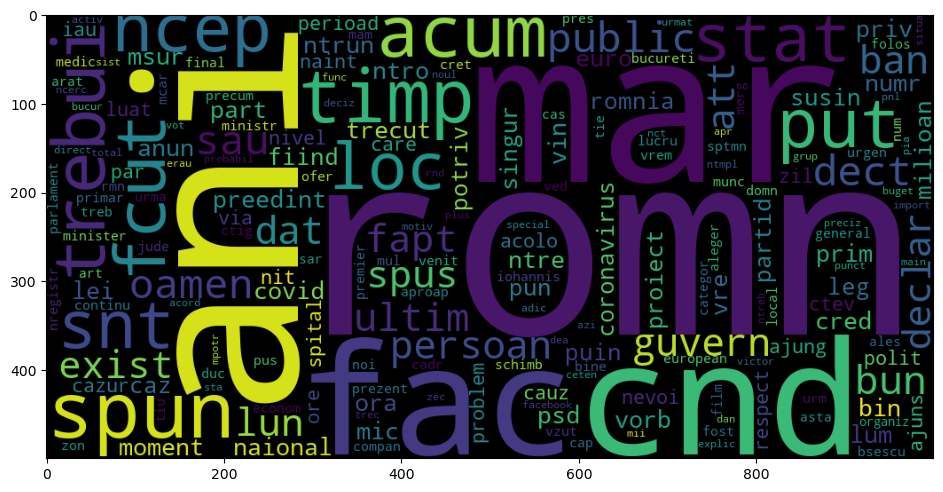

In [36]:
dict_of_words = {}
for row in  news.itertuples():
    for i in row[5].split():  # or 3
        try:
            dict_of_words[i] += 1
        except:
            dict_of_words[i] = 1

#Initializing  WordCloud
wordcloud = WordCloud(background_color = 'black', width=1000, height=500).generate_from_frequencies(dict_of_words)
fig = plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.tight_layout(pad=1)
plt.show()

In [37]:
X = news[["id","text"]]
y = news[["id", "class"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data", len(y_train))
print("Testing Data", len(y_test))

Training Data 56460
Testing Data 14115


In [38]:
y_train = y_train['class']
y_test = y_test['class']

In [39]:
vectorizer = TfidfVectorizer(min_df = 0.0005,
                             max_features = 100000,
                             tokenizer = lambda x: x.split(),
                             ngram_range = (1,4))


X_train = vectorizer.fit_transform(X_train['text'])
X_test = vectorizer.transform(X_test['text'])

C:\Users\David\anaconda3\envs\olympiad\Lib\site-packages\sklearn\feature_extraction\text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [40]:
print("Training Points: ", len(X_train.toarray()),"| Training Features:" , len(X_train.toarray()[0]))
print("Testing Points: ", len(X_test.toarray()),"| Testing Features:" , len(X_test.toarray()[0]))
print()
print("Training Points: ", len(y_train))
print("Testing Points: ", len(y_test))

Training Points:  56460 | Training Features: 41927
Testing Points:  14115 | Testing Features: 41927

Training Points:  56460
Testing Points:  14115


In [46]:
Model = LogisticRegression(C=1, penalty='l2')

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)
print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Acuracy 0.9770456960680127
Macro precision_recall_fscore_support
(0.9770357240867221, 0.9729302629819783, 0.9749248556054264, None)
Micro precision_recall_fscore_support
(0.9770456960680127, 0.9770456960680127, 0.9770456960680127, None)
Weighted precision_recall_fscore_support
(0.9770452403145238, 0.9770456960680127, 0.9769960978501301, None)


In [ ]:
Model = svm.SVC(kernel='linear')
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

In [ ]:
Model = RandomForestClassifier(random_state=0)
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

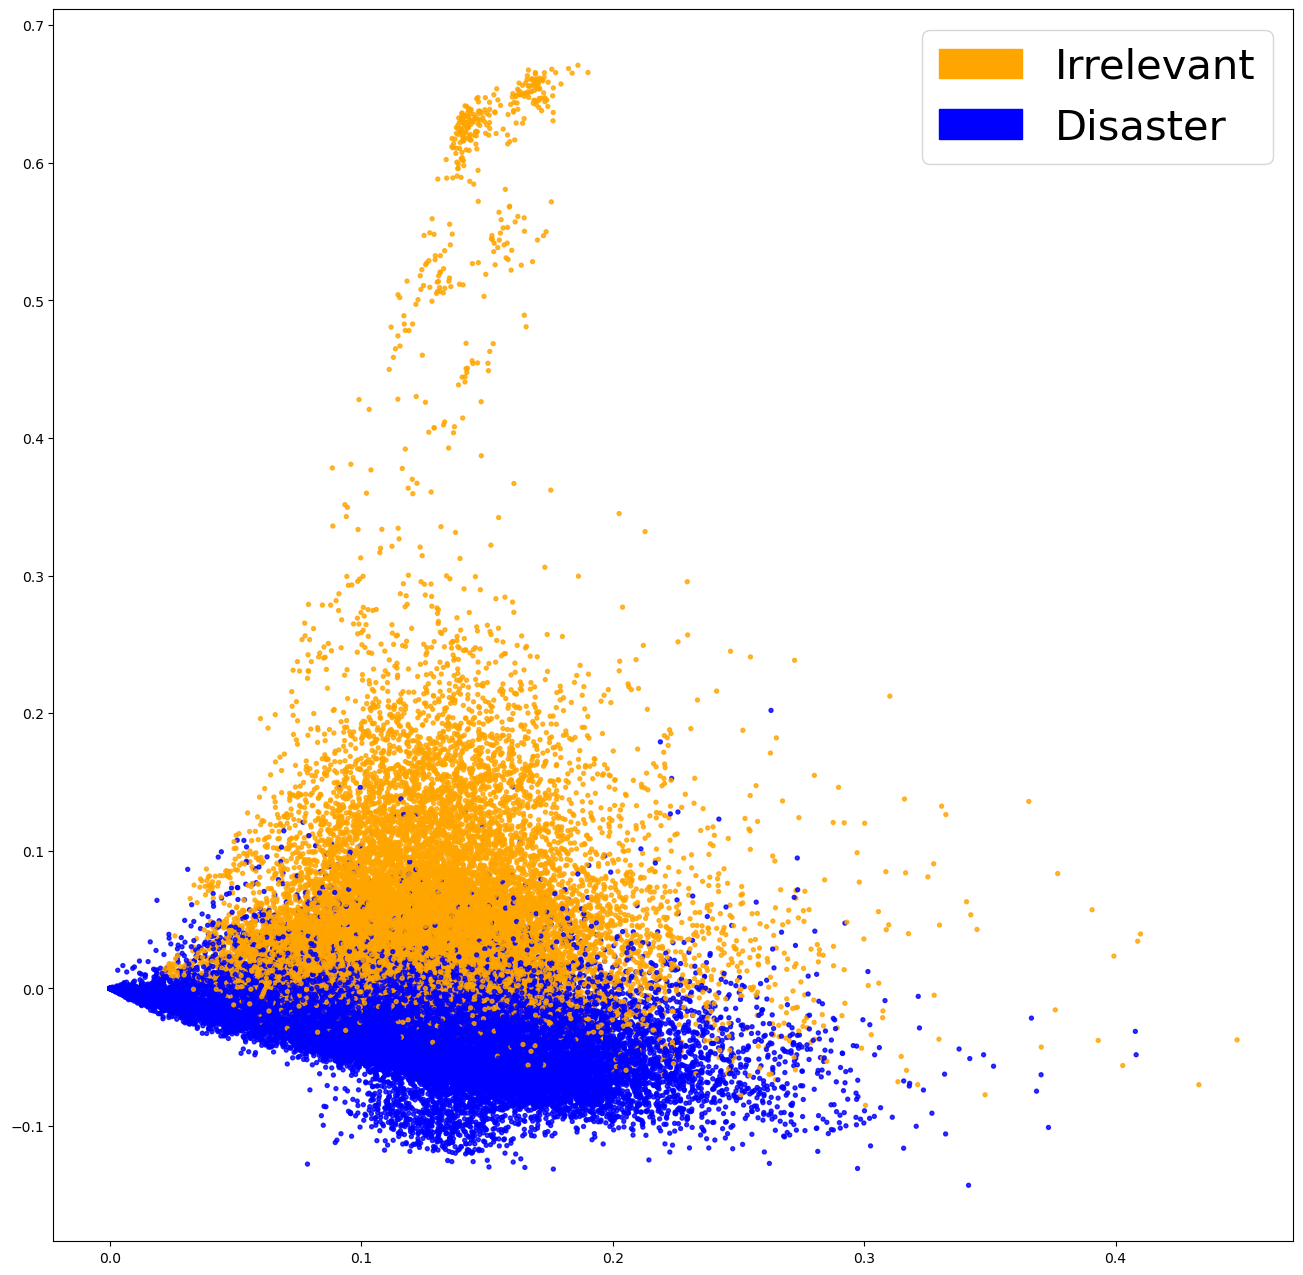

In [43]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='Irrelevant')
            green_patch = mpatches.Patch(color='blue', label='Disaster')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(16, 16))
plot_LSA(X_train, y_train)
plt.show()

In [44]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg',
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(X_train, y_train)

y_predicted_counts = clf.predict(X_test)

C:\Users\David\anaconda3\envs\olympiad\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


In [45]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')

    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')

    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.983, precision = 0.983, recall = 0.983, f1 = 0.983


# From here on I want to get a csv

In [49]:
valid = pd.read_csv("test.csv")

valid['text'] = valid['title'].fillna('') + ' ' + valid['content'].fillna('')
valid = valid.drop(columns=['title', 'content'])

valid['text'] = valid['text'].fillna('')
valid.head()

,id,text
0,0,"Financial Times: SUA, Japonia, Australia și In..."
1,1,Guvernul poate muta Ziua Culturii Române de pe...
2,2,Ministrul ucrainean al Apărării susține că au ...
3,3,"Amantul unei angajate ANAF s-a sinucis, nemais..."
4,4,Boloş: Nu este vorba de o taxă nouă pe concedi...


In [51]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

valid = standardize_text(valid, "text")
valid.head()

,id,text
0,0,"financial times: sua, japonia, australia și in..."
1,1,guvernul poate muta ziua culturii române de pe...
2,2,ministrul ucrainean al apărării susține că au ...
3,3,"amantul unei angajate anaf s-a sinucis, nemais..."
4,4,boloş: nu este vorba de o taxă nouă pe concedi...


In [52]:
def Remove_Url(string):
    return re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%|\-)*\b', '', string)

In [53]:
valid['text'] = valid['text'].apply(Remove_Url)

In [54]:
def Remove_html(string):
    return re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', str(string))

In [55]:
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
stemmer  = SnowballStemmer('romanian')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\David\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\David\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
stopword = stopwords.words('romanian')
def Remove_StopAndStem(string):
    string_list = string.split()
    return ' '.join([stemmer.stem(i) for i in string_list if i not in stopword])

In [57]:
valid['text'] = valid['text'].apply(Remove_StopAndStem)

In [58]:
valid.head()

,id,text
0,0,"financial times: sua, japonia, austral și indi..."
1,1,guvern mut ziu cultur român 15 ianuar 15 iunie...
2,2,ministr ucrainean apărăr susțin finaliz pregăt...
3,3,"amant angaj anaf s-a sinucis, nemaisuport numă..."
4,4,"boloş: vorb tax conced medicale, elimin facil ..."


In [59]:
def Remove_UC(string):
    thestring = re.sub(r'[^a-zA-Z\s]','', string)
    # remove word of length less than 2
    thestring = re.sub(r'\b\w{1,2}\b', '', thestring)
    #https://www.geeksforgeeks.org/python-remove-unwanted-spaces-from-string/
    return re.sub(' +', ' ', thestring)

In [60]:
print("Example of text before Removing Useless Character: \n", news['text'][4],end = "\n\n")
valid['text'] = valid['text'].apply(Remove_UC)
print("Example of text after Removing Useless Character: \n", news['text'][4])

Example of text before Removing Useless Character: 
 campan electoral vesel general cresc campan electoral nau crescut ani ftfrumos strad snt antier stat trag tare snt feric nti doamn chioc dispr pet doz sau mpuin sticl oet spirt medicinal apoi zec vecin muc cpu gospodr ncep repar stlp gardului bolt plas sudat etc meter stat ncep plec salam chifle prnz crnd crc ntmpltor sac ciment plas sudat ideal mncat salam chifl ele 

Example of text after Removing Useless Character: 
 campan electoral vesel general cresc campan electoral nau crescut ani ftfrumos strad snt antier stat trag tare snt feric nti doamn chioc dispr pet doz sau mpuin sticl oet spirt medicinal apoi zec vecin muc cpu gospodr ncep repar stlp gardului bolt plas sudat etc meter stat ncep plec salam chifle prnz crnd crc ntmpltor sac ciment plas sudat ideal mncat salam chifl ele 


In [61]:
valid.to_csv("clean_test.csv")

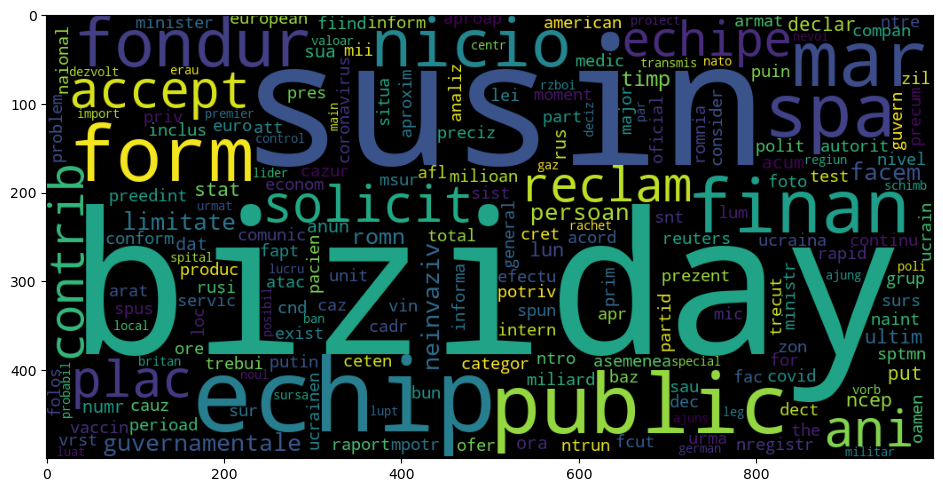

In [64]:
dict_of_words = {}
for row in  valid.itertuples():
    for i in row[2].split():  # or 3
        try:
            dict_of_words[i] += 1
        except:
            dict_of_words[i] = 1

#Initializing  WordCloud
wordcloud = WordCloud(background_color = 'black', width=1000, height=500).generate_from_frequencies(dict_of_words)
fig = plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.tight_layout(pad=1)
plt.show()

In [65]:
X_valid = vectorizer.transform(valid['text'])

In [66]:
print("Validation Points: ", len(X_valid.toarray()),"| Testing Features:" , len(X_valid.toarray()[0]))

Validation Points:  36669 | Testing Features: 41927


In [67]:
y_pred = clf.predict(X_valid)

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [71]:
sample_test_solution = pd.read_csv("sample_test_solution.csv")
sample_test_solution["class"] = clf.predict(X_valid)
sample_test_solution.to_csv("solution.csv", index=False)